In [1]:
using Turing
using Turing: Variational
using Distributions
using Distances
using AbstractGPs, KernelFunctions
using Plots
using StatsFuns
import Random
using Flux
using ProgressBars
import LinearAlgebra

In [2]:
x = distance = Vector{Float64}([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
n = tries = Vector{Int64}([1433, 694, 455,353,272,256,240,217,200,237,202,192,174,167,201,195,191,147,152])
y = success = Vector{Float64}([1346,577,337,208,149,136,111,69,67,75,52,46,54,28,27,31,33,20,24])

19-element Vector{Float64}:
 1346.0
  577.0
  337.0
  208.0
  149.0
  136.0
  111.0
   69.0
   67.0
   75.0
   52.0
   46.0
   54.0
   28.0
   27.0
   31.0
   33.0
   20.0
   24.0

In [3]:
pj = y ./ n
error = @. sqrt((pj * (1 - pj) / n));

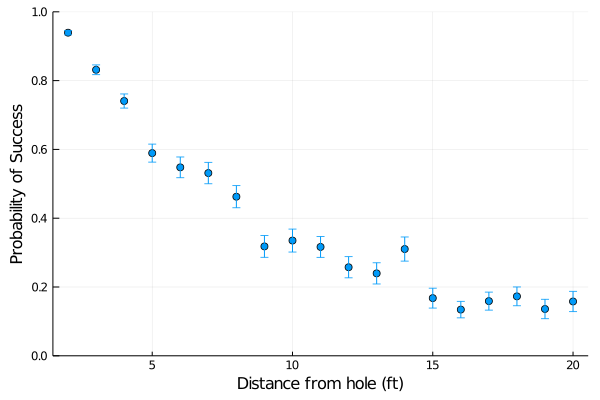

In [4]:
# plot out the error
scatter(
  x, pj,
  yerror= error,
  legend = false,
  ylim = (0, 1),
  ylab = "Probability of Success",
  xlab = "Distance from hole (ft)")

Here, we will apply the same Kernel as provided in answer 1, which is RBG kernel but slightly different which is basically. 

\begin{equation}
    y \sim Binomial(n, p)
\end{equation}

\begin{equation}
    logit(p) = L\cdot\eta + \beta \cdot1_N, \quad where L=cholesky(K)
\end{equation}


\begin{equation}
   \eta \sim Normal(0, 1)
\end{equation}

\begin{equation}
   \alpha \sim LogNormal(0, 1)
\end{equation}

\begin{equation}
   \rho \sim LogNormal(0, 1)
\end{equation}


\begin{equation}
   \beta \sim Normal(0, 1)
\end{equation}



In [5]:
# Define a kernel.
sekernel(alpha, rho) = alpha^2 * transform(KernelFunctions.SEKernel(), invsqrt2/rho)

function compute_f(kernel, X, eta, beta=0, jitter=0)
  K = kernelmatrix(kernel, X) + LinearAlgebra.I * jitter
  return LinearAlgebra.cholesky(K).L * eta .+ beta
end


@model function GPClassify(y, X, n, jitter=1e-6)
    # Priors.
    alpha ~ LogNormal(0, 1)
    rho ~ LogNormal(0, 1)
    beta ~ Normal(0, 1)  # intercept.
    eta ~ filldist(Normal(0, 1), length(y))

    # Latent GP
    kernel = sekernel(alpha, rho)
    f = compute_f(sekernel(alpha, rho), X, eta, beta, jitter)
    
    # Sampling Distribution.
    for i in 1:length(X)
    y[i] ~ Binomial(n[i], logistic(f[i]))
    end
end;

m =  GPClassify(y, x, n);

In [21]:
### Fit via HMC ###
Random.seed!(0)
burn = 500
nsamples = 500
@time hmc_chain = sample(m, HMC(0.05, 20), burn + nsamples);

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/itachiuchiha/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ

  1.581009 seconds (1.94 M allocations: 3.666 GiB, 15.68% gc time)


In [22]:
hmc_chain

Chains MCMC chain (1000×31×1 Array{Float64, 3}):

Iterations        = 1:1:1000
Number of chains  = 1
Samples per chain = 1000
parameters        = alpha, beta, eta[1], eta[2], eta[3], eta[4], eta[5], eta[6], eta[7], eta[8], eta[9], eta[10], eta[11], eta[12], eta[13], eta[14], eta[15], eta[16], eta[17], eta[18], eta[19], rho
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, n_steps, nom_step_size, step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse       ess      rhat 
      Symbol   Float64   Float64    Float64   Float64   Float64   Float64 

       alpha    0.4393    0.2845     0.0090    0.0907    2.2980    2.6511
        beta    0.9302    0.5984     0.0189    0.1908    2.2980    2.6511
      eta[1]    9.8928   11.2760     0.3566    3.5954    2.2980    2.6511
      eta[2]    3.5821    5.5264     0.1748    1.7621    2.2980    2.6511
      eta[3]    1.9757    1.9205     0.0607    0.6124    2.2980

┌ Warning: timestamp of type Missing unknown
└ @ MCMCChains /home/itachiuchiha/.julia/packages/MCMCChains/IKF6o/src/chains.jl:364
┌ Warning: timestamp of type Missing unknown
└ @ MCMCChains /home/itachiuchiha/.julia/packages/MCMCChains/IKF6o/src/chains.jl:364


In [23]:
# Get posterior samples
kernel_params = [:alpha, :rho, :beta];

hmc_samples = Dict{Symbol, Any}([
    sym => vec(group(hmc_chain, sym).value.data)[end-nsamples+1:end]
for sym in kernel_params])
hmc_samples[:eta] = Matrix(group(hmc_chain, :eta).
                           value.data[end-nsamples+1:end, :, 1]')

19×500 Matrix{Float64}:
  0.123901    0.123901    0.123901   …   22.8953     22.8953     22.8953
 -1.20577    -1.20577    -1.20577         9.95466     9.95466     9.95466
  0.311817    0.311817    0.311817        4.19023     4.19023     4.19023
 -0.234641   -0.234641   -0.234641        2.34592     2.34592     2.34592
 -1.08735    -1.08735    -1.08735         2.36511     2.36511     2.36511
  0.462311    0.462311    0.462311   …   -0.978791   -0.978791   -0.978791
 -0.0805931  -0.0805931  -0.0805931      -1.22053    -1.22053    -1.22053
 -0.812431   -0.812431   -0.812431       -2.56574    -2.56574    -2.56574
 -2.06103    -2.06103    -2.06103         0.141987    0.141987    0.141987
  0.313056    0.313056    0.313056       -5.25256    -5.25256    -5.25256
 -0.47943    -0.47943    -0.47943    …   -4.57755    -4.57755    -4.57755
 -0.944389   -0.944389   -0.944389       -4.05386    -4.05386    -4.05386
  1.82432     1.82432     1.82432        -7.99264    -7.99264    -7.99264
 -1.0583     

In [24]:
alpha = hmc_samples[:alpha]
beta = hmc_samples[:beta]
rho = hmc_samples[:rho]
eta = hmc_samples[:eta]
jitter=1e-6

1.0e-6

In [33]:
# kernel = sekernel(alpha[1], rho[1])
# gp = GP(beta[1], kernel)
# f = compute_f(kernel, x, eta[:, 1], beta[1])
# predict_mu = logistic.(mean(f))
# predict_var = logistic.(var(f))

pred = []

for i in 1:length(alpha)
    kernel = sekernel(alpha[i], rho[i])
    gp = GP(beta[i], kernel)
    f = compute_f(kernel, x, eta[:, i], beta[i])
    predict = logistic.(f)
    push!(pred, predict)
end

In [34]:
mu_v = Vector{Float64}()
var_v = Vector{Float64}()

for i in 1:19
    a = Vector{Float64}()
    for j in 1:length(alpha)
        push!(a, pred[j][i])
    
    end
    push!(mu_v, mean(a))
    push!(var_v, var(a))
end


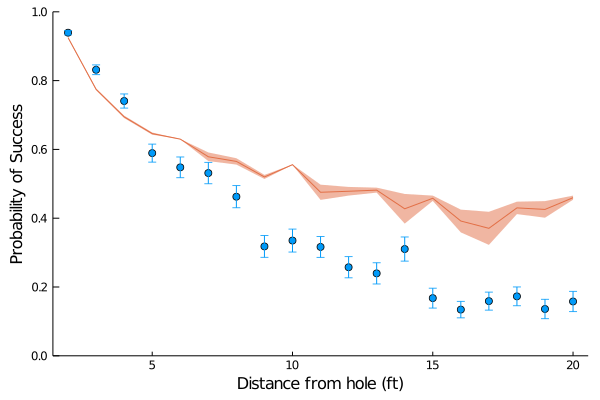

In [35]:
# plot out the error
scatter(
  x, pj,
  yerror= error,
  legend = false,
  ylim = (0, 1),
  ylab = "Probability of Success",
  xlab = "Distance from hole (ft)")

plot!(x,mu_v,grid=false,ribbon=var_v, fillalpha=.5, label="GPPosteriorPrediction with Uncertainty")

The results show the posterior predictive density of the Gaussian Process. Clearly, we can see the Gaussian Process is not doing well over the dataset. The reason could be, the kernel that was choosen was not the right kernel for the given dataset. Even though in the first value we can see that GP has been able to recognize that value with very little uncercainty but later the uncertainty increases as the data increases, also the predictions were not near the desirable results. 